In [65]:
import os
import glob
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [66]:
dataset_path = "/kaggle/input/mlassignment"

pos_path = "/kaggle/input/mlassignment/txt_sentoken/pos"
neg_path = "/kaggle/input/mlassignment/txt_sentoken/neg"

print("Dataset loaded successfully!")

Dataset loaded successfully!


**load_data** is a function that:

* Reads all .txt files from a folder.
* Converts text to lowercase.
* Removes non-alphabetic characters.
* Adds a label (1 for positive, 0 for negative).
* Then it loads positive and negative reviews and combines them.

* **re.sub(r'\W+', ' ', text)** :  It replaces all non-word characters (punctuation, symbols) with a space.
* zip(*all_data) : It separates the texts and labels into two separate lists.


In [67]:
def load_data(folder, label):
    files = glob.glob(os.path.join(folder, "*.txt"))
    data = []
    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            text = f.read().strip().lower()
            text = re.sub(r'\W+', ' ', text)
            if text:
                data.append((text, label))
    return data

pos_reviews = load_data(pos_path, 1)
neg_reviews = load_data(neg_path, 0)

all_data = pos_reviews + neg_reviews
texts, labels = zip(*all_data)

print(f"Loaded {len(pos_reviews)} positive reviews and {len(neg_reviews)} negative reviews.")

Loaded 1000 positive reviews and 1000 negative reviews.


**Convert text to numerical features using TF-IDF**
* It converts text documents into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) method.It gives importance to words that are frequent in a document but rare across other documents.
* **TfidfVectorizer(max_features=5000):** Transforms text into numerical features using TF-IDF method, keeping only the top 5000 most important
* **words.fit_transform(texts):** Learns the vocabulary and transforms the texts to a sparse matrix X
* **y = np.array(labels):** Converts the list of labels into a NumPy array for compatibility with ML models.


In [68]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)
y = np.array(labels)

print("TF-IDF transformation completed!")


TF-IDF transformation completed!


**Split into training and testing sets**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

Training set size: 1600, Testing set size: 400


**Train Naïve Bayes classifier
   and Train Linear SVM classifier** 

In [70]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Models trained successfully!")

Models trained successfully!


In [71]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_nb, "Naïve Bayes")
evaluate_model(y_test, y_pred_svm, "Linear SVM")


Model: Naïve Bayes
Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       201
           1       0.82      0.82      0.82       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


Model: Linear SVM
Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       201
           1       0.82      0.90      0.86       199

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.85      0.85       400



**Define Genre Classification Function**

In [72]:
genres = ["action", "adventure", "drama", "romantic"]

def classify_genre(text):
    for genre in genres:cS
        if genre in text:
            return genre
    return "unknown"
    
genre_labels = [classify_genre(text) for text in texts]
genre_dict_nb = {genre: [] for genre in genres}
genre_dict_svm = {genre: [] for genre in genres}

for i, genre in enumerate(genre_labels):
    if genre in genre_dict_nb and i < len(y_test):
        genre_dict_nb[genre].append((y_test[i], y_pred_nb[i]))  
        genre_dict_svm[genre].append((y_test[i], y_pred_svm[i]))  

print("Genre classification applied!")

Genre classification applied!


**Evaluate Genre-wise Accuracy for Both Models**

In [73]:
genre_accuracies = []

def evaluate_by_genre(model_name, genre_dict):

    print(f"\nGenre-wise Accuracy using {model_name}:")
    for genre, results in genre_dict.items():
        if results:
            actual, predicted = zip(*results)
            acc = accuracy_score(actual, predicted)
            genre_accuracies.append([genre, model_name, acc])
            print(f"{genre.capitalize()}: Accuracy = {acc:.2f}")

evaluate_by_genre("Naïve Bayes", genre_dict_nb)
evaluate_by_genre("Linear SVM", genre_dict_svm)


Genre-wise Accuracy using Naïve Bayes:
Action: Accuracy = 0.79
Adventure: Accuracy = 1.00
Drama: Accuracy = 0.91
Romantic: Accuracy = 0.93

Genre-wise Accuracy using Linear SVM:
Action: Accuracy = 0.85
Adventure: Accuracy = 1.00
Drama: Accuracy = 0.84
Romantic: Accuracy = 0.93


**Visualize Genre-wise Accuracy Comparison**

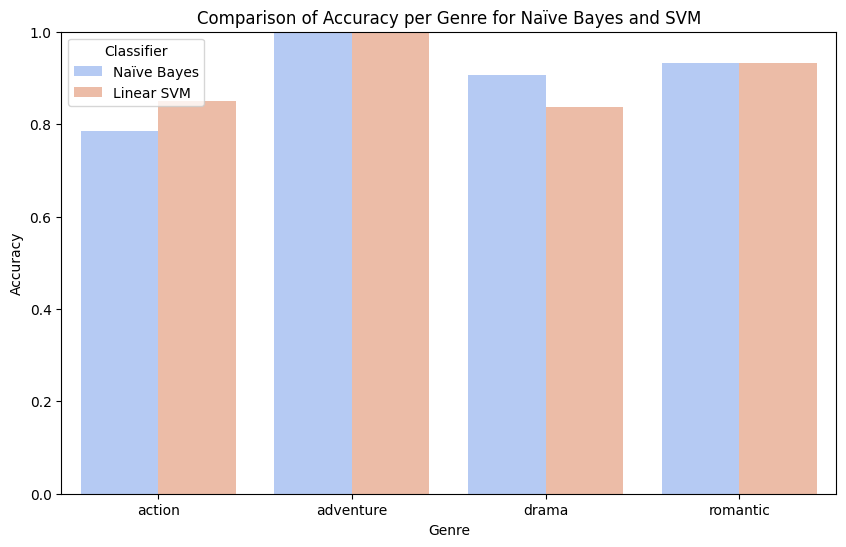

In [74]:
df_genre_acc = pd.DataFrame(genre_accuracies, columns=["Genre", "Model", "Accuracy"])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Genre", y="Accuracy", hue="Model", data=df_genre_acc, palette="coolwarm")
plt.title("Comparison of Accuracy per Genre for Naïve Bayes and SVM")
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.legend(title="Classifier")
plt.ylim(0, 1)
plt.show()

**Visualize Confusion Matrices**

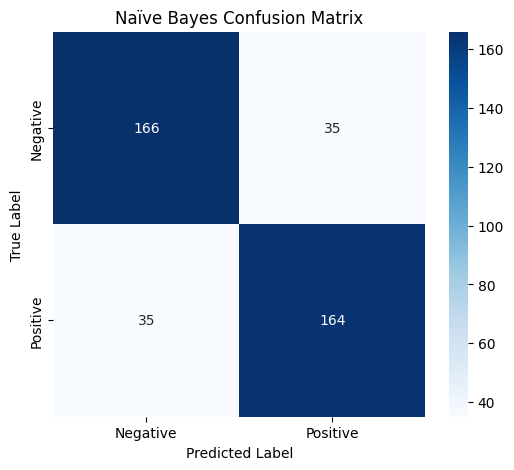

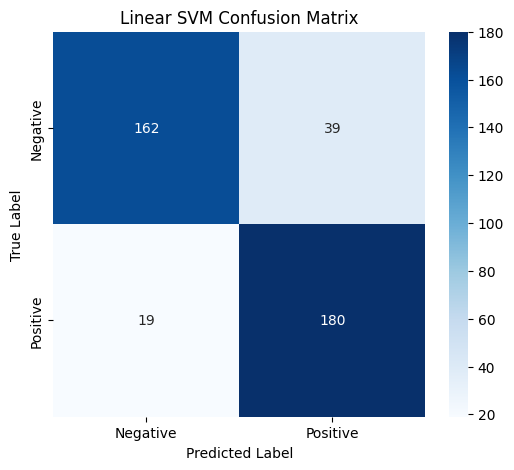

In [75]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "Linear SVM Confusion Matrix")


**Compute Evaluation Metrics for Each Classifier**

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_comparison = []

def compute_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    
    model_comparison.append([model_name, acc, precision, recall, f1])

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

compute_metrics(y_test, y_pred_nb, "Naïve Bayes")
compute_metrics(y_test, y_pred_svm, "Linear SVM")


Model: Naïve Bayes
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82

Model: Linear SVM
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85


**Convert Metrics into a DataFrame for Visualization**

In [77]:
df_metrics = pd.DataFrame(model_comparison, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_metrics.set_index("Model", inplace=True)
df_metrics

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Naïve Bayes,0.825,0.825000,0.825,0.825000
Linear SVM,0.855,0.858655,0.855,0.854673


**Visualize Classifier Performance Comparison**

<Figure size 1000x600 with 0 Axes>

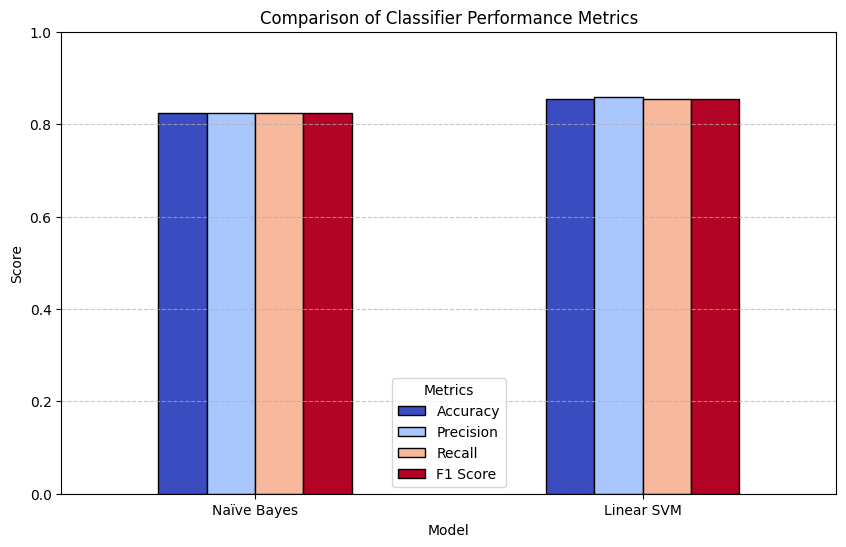

In [78]:
plt.figure(figsize=(10, 6))
df_metrics.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Comparison of Classifier Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**New Method Implementation**

In [79]:

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

In [80]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)


In [81]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)


XGBoost Accuracy: 0.8050

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       201
           1       0.80      0.81      0.81       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



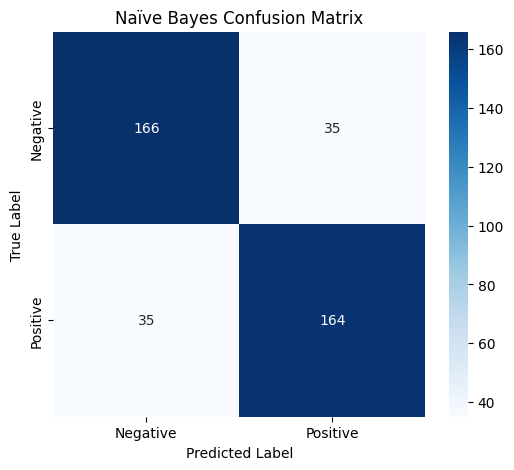

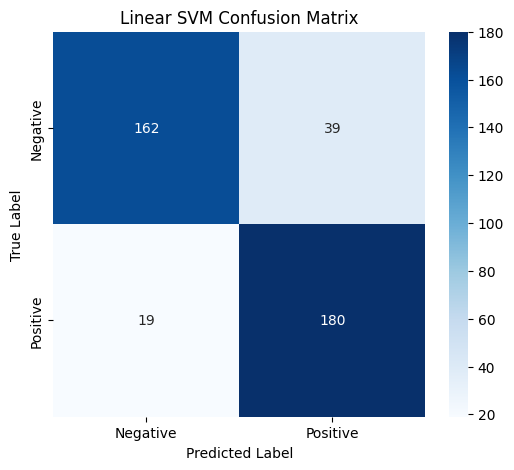

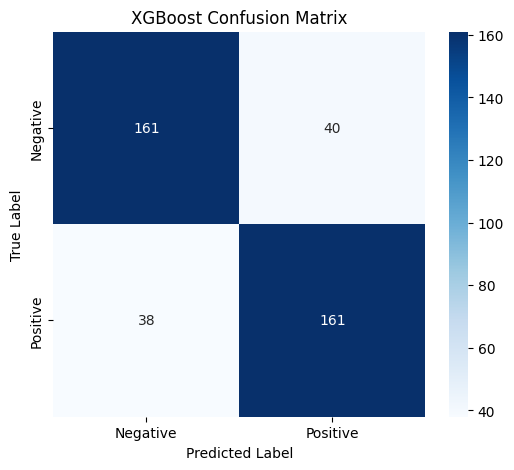

In [82]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_svm, "Linear SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")



Model: Naïve Bayes
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82

Model: Linear SVM
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85

Model: XGBoost
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


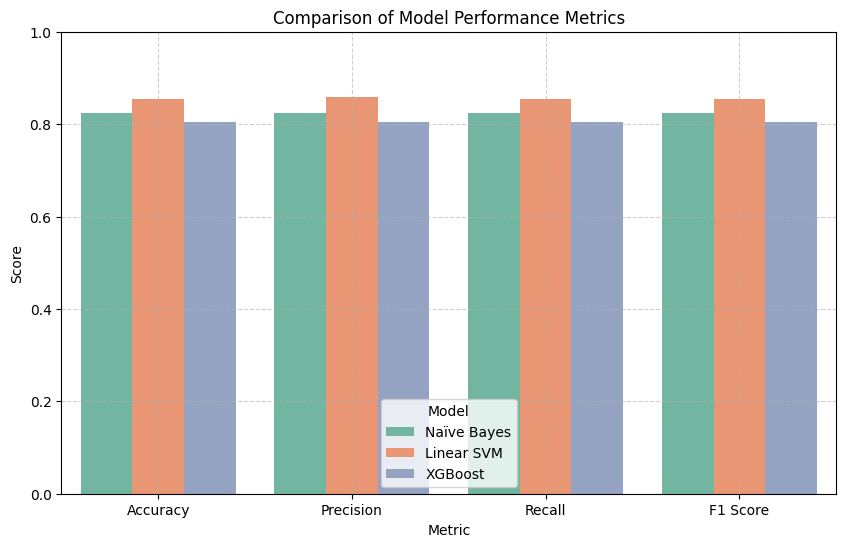

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_comparison = []

def compute_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    
    model_comparison.append([model_name, acc, precision, recall, f1])

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

compute_metrics(y_test, y_pred_nb, "Naïve Bayes")
compute_metrics(y_test, y_pred_svm, "Linear SVM")
compute_metrics(y_test, y_pred_xgb, "XGBoost")

df_metrics = pd.DataFrame(model_comparison, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_metrics_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics_melted, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Comparison of Model Performance Metrics")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [86]:
df_metrics = pd.DataFrame(model_comparison, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_metrics.set_index("Model", inplace=True)
df_metrics


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Naïve Bayes,0.825,0.825000,0.825,0.825000
Linear SVM,0.855,0.858655,0.855,0.854673
XGBoost,0.805,0.805040,0.805,0.805000


<Figure size 1000x600 with 0 Axes>

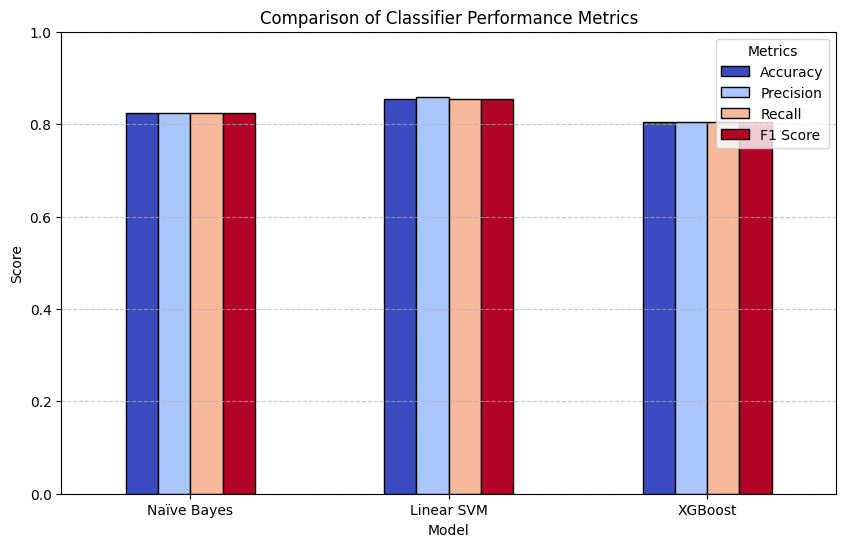

In [85]:
plt.figure(figsize=(10, 6))
df_metrics.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Comparison of Classifier Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
